In [220]:
# !pip install micromlgen
# !pip install xgboost
# !pip install treelite
# !pip install lightgbm
import warnings
warnings.filterwarnings("ignore")

In [221]:
%matplotlib inline
import time
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy import stats, signal
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from scipy.signal import find_peaks, savgol_filter
from scipy.stats import entropy, skew, kurtosis
from scipy.signal import welch
from numpy import cov
import matplotlib.colors as mcolors
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg
from IPython.core.interactiveshell import InteractiveShell
# from plotly.graph_objs import go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo
import json
import warnings
import math
import scipy as sp
import scipy.fftpack
import os
import tkinter as tk
from tkinter import messagebox
import pickle
import easygui
import joblib
import sys
def calculate_metrics_class(confusion_test, class_names):
    # T·∫°o DataFrame t·ª´ confusion matrix
    confusion_matrix_df = pd.DataFrame(confusion_test, index=class_names, columns=class_names)
    
    # Chuy·ªÉn DataFrame th√†nh numpy array
    confusion_matrix = confusion_matrix_df.values

    # Kh·ªüi t·∫°o danh s√°ch l∆∞u c√°c metric
    metrics = []

    # Kh·ªüi t·∫°o t·ªïng cho c√°c ch·ªâ s·ªë ƒë·ªÉ t√≠nh overall
    TP_total, FP_total, FN_total, TN_total = 0, 0, 0, 0

    # S·ªë l·ªõp ph√¢n lo·∫°i
    n_classes = len(confusion_matrix)

    # T√≠nh metric cho t·ª´ng l·ªõp
    for i in range(n_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP
        TN = np.sum(confusion_matrix) - (TP + FP + FN)

        # T√≠nh c√°c ch·ªâ s·ªë
        accuracy = (TP + TN) / np.sum(confusion_matrix)
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1_score = (2 * precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

        # Th√™m v√†o danh s√°ch
        metrics.append({
            'Activity': class_names[i],
            'Acc': round(accuracy * 100, 1),
            'Sen': round(sensitivity * 100, 1),
            'Spe': round(specificity * 100, 1),
            'Pre': round(precision * 100, 1),
            'F1': round(f1_score * 100, 1)
        })

        # C·ªông d·ªìn c√°c t·ªïng
        TP_total += TP
        FP_total += FP
        FN_total += FN
        TN_total += TN

    # T√≠nh c√°c ch·ªâ s·ªë t·ªïng th·ªÉ (macro average v√† micro average)
    overall_accuracy = (TP_total + TN_total) / (TP_total + FP_total + FN_total + TN_total) if (TP_total + FP_total + FN_total + TN_total) > 0 else 0
    overall_precision = TP_total / (TP_total + FP_total) if (TP_total + FP_total) > 0 else 0
    overall_sensitivity = TP_total / (TP_total + FN_total) if (TP_total + FN_total) > 0 else 0
    overall_specificity = TN_total / (TN_total + FP_total) if (TN_total + FP_total) > 0 else 0
    overall_f1_macro = np.mean([m['F1'] for m in metrics]) / 100  # trung b√¨nh c√°c F1 t·ª´ng l·ªõp, chia l·∫°i v·ªÅ [0,1]

    # T·∫°o DataFrame
    metrics_df = pd.DataFrame(metrics)
    overall_metrics = pd.DataFrame([{
        'Activity': 'Overall',
        'Acc': round(overall_accuracy * 100, 1),
        'Sen': round(overall_sensitivity * 100, 1),
        'Spe': round(overall_specificity * 100, 1),
        'Pre': round(overall_precision * 100, 1),
        'F1': round(overall_f1_macro * 100, 1)
    }])

    # G·ªôp l·∫°i
    full_metrics_df = pd.concat([metrics_df, overall_metrics], ignore_index=True)

    return full_metrics_df
def calculate_metrics(conf_matrix, class_labels):
    # T√≠nh to√°n TP, FP, FN, TN
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (TP + FP + FN)

    # T√≠nh Accuracy, Sensitivity, Specificity cho t·ª´ng l·ªõp
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    metrics = []
    for i in range(len(conf_matrix)):
        metrics.append({
            'Activity': class_labels[i],
            'Acc': round(accuracy[i] * 100, 1),
            'Sen': round(sensitivity[i] * 100, 1),
            'Spe': round(specificity[i] * 100, 1),
            'Pre': round(precision[i] * 100, 1),
            'F1': round(f1[i] * 100, 1)
        })

    # T·∫°o y_true v√† y_pred t·ª´ ma tr·∫≠n nh·∫ßm l·∫´n ƒë·ªÉ t√≠nh f1_micro
    y_true_all = []
    y_pred_all = []
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix)):
            count = conf_matrix[i, j]
            y_true_all += [i] * count
            y_pred_all += [j] * count

    f1_micro = f1_score(y_true_all, y_pred_all, average='micro', zero_division=0)

    # T√≠nh trung b√¨nh c√°c ch·ªâ s·ªë (b·ªè qua NaN)
    avg_accuracy = np.nanmean(accuracy)
    avg_sensitivity = np.nanmean(sensitivity)
    avg_specificity = np.nanmean(specificity)
    avg_precision = np.nanmean(precision)
    return avg_accuracy, avg_sensitivity, avg_specificity, avg_precision, f1_micro
def feature_selection_with_rf(model, train_features, test_features, label_train, feature_names, threshold):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    final_feature_name =[]
    remaining_features = feature_names.copy()
    X_train, X_test = np.array(train_features), np.array(test_features)
    
    removed_features_all = []  # Danh s√°ch ch·ª©a c√°c ƒë·∫∑c tr∆∞ng b·ªã lo·∫°i b·ªè v√† gi√° tr·ªã quan tr·ªçng c·ªßa ch√∫ng

    while len(remaining_features) > 1:
        # Hu·∫•n luy·ªán Random Forest
        model.fit(X_train, label_train)

        # T·∫ßm quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng
        importances = model.feature_importances_

        # S·∫Øp x·∫øp theo th·ª© t·ª± gi·∫£m d·∫ßn (cao -> th·∫•p)
        sorted_idx = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_idx]
        sorted_features = [remaining_features[i] for i in sorted_idx]

        # L·ªçc c√°c ƒë·∫∑c tr∆∞ng c√≥ ƒë·ªô quan tr·ªçng >= threshold
        important_indices = sorted_idx[sorted_importances >= threshold]
        removed_indices = sorted_idx[sorted_importances < threshold]

        # N·∫øu kh√¥ng c√≤n ƒë·∫∑c tr∆∞ng n√†o d∆∞·ªõi ng∆∞·ª°ng, tho√°t v√≤ng l·∫∑p
        if len(removed_indices) == 0:
            # print("No features removed (all importance >= threshold).")
            break

        # L∆∞u c√°c ƒë·∫∑c tr∆∞ng b·ªã lo·∫°i b·ªè v√† gi√° tr·ªã quan tr·ªçng c·ªßa ch√∫ng
        removed_features = [(remaining_features[i], importances[i]) for i in removed_indices]
        removed_features_all.extend(removed_features)
        # print(f"Removing features: {', '.join([f'{f[0]} ({f[1]:.4f})' for f in removed_features])}")

        # C·∫≠p nh·∫≠t t·∫≠p d·ªØ li·ªáu v√† danh s√°ch ƒë·∫∑c tr∆∞ng c√≤n l·∫°i
        remaining_features = [remaining_features[i] for i in important_indices]
        X_train = X_train[:, important_indices]
        X_test = X_test[:, important_indices]

    # Chu·∫©n b·ªã d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì
    final_importances = model.feature_importances_
    sorted_idx = np.argsort(final_importances)[::-1]
    remaining_features_sorted = [remaining_features[i] for i in sorted_idx]
    remaining_importances_sorted = final_importances[sorted_idx]

    removed_features_sorted = sorted(removed_features_all, key=lambda x: x[1], reverse=True)
    removed_feature_names = [f[0] for f in removed_features_sorted]
    removed_importances = [f[1] for f in removed_features_sorted]

    all_features = remaining_features_sorted + removed_feature_names
    all_importances = list(remaining_importances_sorted) + list(removed_importances)
    all_colors = ['skyblue'] * len(remaining_features_sorted) + ['red'] * len(removed_feature_names)

    # T√≠nh ƒë·ªô l·ªách chu·∫©n c·ªßa t·∫•t c·∫£ c√°c gi√° tr·ªã quan tr·ªçng
    all_importances_std = np.std(all_importances)
    print(f"\nStandard deviation of importance scores (including removed and remaining features): {all_importances_std:.4f}")
    print(f"\n Mean of importance scores (including removed and remaining features): {np.mean(all_importances):.4f}")
    # V·∫Ω bi·ªÉu ƒë·ªì g·ªôp
    plt.figure(figsize=(4, max(6, len(all_features) * 0.136)))
    plt.barh(all_features, all_importances, color=all_colors)
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # ƒê·∫£m b·∫£o c√°c ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t ·ªü tr√™n c√πng
    plt.margins(y=0)  # Lo·∫°i b·ªè kho·∫£ng tr·∫Øng theo tr·ª•c Y

    # Ho·∫∑c c√≥ th·ªÉ tinh ch·ªânh l·ªÅ n·∫øu c·∫ßn k·ªπ h∆°n
    # plt.subplots_adjust(top=0.98, bottom=0.02)
    # Th√™m ch√∫ th√≠ch
    important_patch = plt.Line2D([0], [0], color='skyblue', lw=4, label='Important Features')
    less_important_patch = plt.Line2D([0], [0], color='red', lw=4, label='Less Important Features')
    plt.legend(handles=[important_patch, less_important_patch], loc='lower right')

    plt.tight_layout()
    plt.show()

    print("\nFinal remaining features:")
    print(remaining_features)
    # for feature, importance in zip(remaining_features_sorted, remaining_importances_sorted):
    #     print(f"{feature}")

    # print("\nRemoved features (sorted by importance):")
    # for feature, importance in removed_features_sorted:
    #     print(f"{feature}: {importance:.4f}")


    return X_train, X_test, remaining_features


# H√†m t√≠nh k√≠ch th∆∞·ªõc m√¥ h√¨nh
def model_size_in_bytes(model):
    return len(pickle.dumps(model))

# H√†m t√≠nh ƒë·∫∑c tr∆∞ng
def featuresFromBuffer(at):
    feat = np.zeros(48)   
    ax = np.array(at['Acc_X'], dtype=np.float64)
    ay = np.array(at['Acc_Y'], dtype=np.float64)
    az = np.array(at['Acc_Z'], dtype=np.float64)
    mag = np.sqrt(ax**2+ay**2+az**2)-1
    # Mean
    mean_acc = [np.mean(i) for i in [ax, ay, az]]
    feat[0:3] = mean_acc

    # Energy
    energy_acc = [np.sqrt(np.mean(i**2)) for i in [ax, ay, az]]
    feat[3:6] = energy_acc

    # Standard Deviation (std)
    std_acc = [np.std(i) for i in [ax, ay, az]]
    feat[6:9] = std_acc

    # Maximum
    max_ = [np.max(i) for i in [ax, ay, az]]
    feat[9:12] = max_

    # Range
    Range_acc = [np.amax(i) - np.amin(i) for i in [ax, ay, az]]
    feat[12:15] = Range_acc

    # Mean Absolute Deviation
    mad_acc = [np.mean(np.abs(i - np.mean(i))) for i in [ax, ay, az]]
    feat[15:18] = mad_acc

    # Skewness
    skewness_acc = [skew(i) for i in [ax, ay, az]]
    feat[18:21] = skewness_acc

    # Kurtosis
    kurtosis_acc = [kurtosis(i) for i in [ax, ay, az]]
    feat[21:24] = kurtosis_acc

    # Interquartile Range
    iqr_val = [np.percentile(i, 75) - np.percentile(i, 25) for i in [ax, ay, az]]
    feat[24:27] = iqr_val

    # Signal Magnitude Area (SMA)
    sma_acc = [np.sum(np.abs(i)) for i in [ax, ay, az]]
    feat[27:30] = sma_acc

    # Simple Square Integral
    ssi_acc = [np.sum(i**2) for i in [ax, ay, az]]
    feat[30:33] = ssi_acc

    # Median Absolute Deviation
    median_mad_acc = [np.median(np.abs(i - np.median(i))) for i in [ax, ay, az]]
    feat[33:36] = median_mad_acc
    
    # Hjorth Mobility
    hjorth_mobility_acc = [np.sqrt(np.var(np.diff(i)) / np.var(i)) for i in [ax, ay, az]]
    feat[36:39] = hjorth_mobility_acc  # V·ªã tr√≠ l∆∞u Hjorth Mobility

    # Hjorth Complexity
    hjorth_complexity_acc = [
        (np.sqrt(np.var(np.diff(np.diff(i))) / np.var(np.diff(i))) /
        np.sqrt(np.var(np.diff(i)) / np.var(i)))
        for i in [ax, ay, az]
    ]
    feat[39:42] = hjorth_complexity_acc  # V·ªã tr√≠ l∆∞u Hjorth Complexity
    
    #  (lag=1)
    autocorr_acc = [acf(i, nlags=1)[1] for i in [ax, ay, az]]
    feat[42:45] = autocorr_acc  # V·ªã tr√≠ l∆∞u Autocorrelation
    
    #Average Amplitude Change
    avg_amp_change = [np.mean(np.abs(np.diff(i))) for i in [ax, ay, az]]
    feat[45:48] = avg_amp_change  # V·ªã tr√≠ l∆∞u Average Amplitude Change
    
    return feat

# T√™n c√°c ƒë·∫∑c tr∆∞ng
Feature_name_ = ['mean x', 'mean y', 'mean z', 'ene x', 'ene y', 'ene z',
                'std x', 'std y', 'std z', 'max x', 'max y', 'max z',
                'range x', 'range y', 'range z', 'mad x', 'mad y', 'mad z',
                'skew x', 'skew y', 'skew z', 'kur x', 'kur y', 'kur z',
                'iqr x', 'iqr y', 'iqr z', 'sma x', 'sma y', 'sma z',
                'ssi x', 'ssi y', 'ssi z', 'mead x', 'mead y', 'mead z',
                'hm x', 'hm y', 'hm z', 'hc x', 'hc y', 'hc z', 
                'autoc x', 'autoc y', 'autoc z', 'aac x', 'aac y', 'aac z'
                ]

0xx. ƒëi ,1xx. ƒë·ª©ng, 2xx. n·∫±m, 3xx. ng·ªìi, 4xx. ch·∫°y b·ªô, 5xx. ƒëi khom l∆∞ng, 6xx. b√≤ th·∫•p, 7xx. b√≤ tr∆∞·ªùn, 8xx. ng√£, 9xx Downstair i.xxx upstair

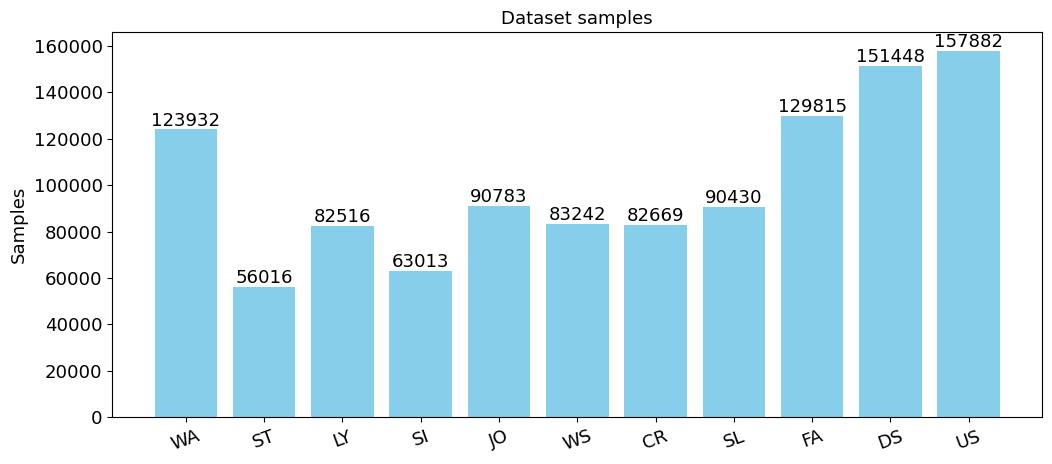

In [222]:
w_Walking  = []; w_Standing = []; w_Lying = []; w_Sitting= []; w_Jogging = []; w_WalkStoop = []; w_Crawling= [];  w_Slithering =[]; w_Falling =[] ; w_DownStair = []; w_UpStair =[]
# class_names = ['walking','Standing', 'Lying', 'Sitting','Jogging','WalkStoop','Crawling','Slithering','Falling', 'Downstair', 'Upstair']
class_names = ['WA','ST', 'LY', 'SI','JO','WS','CR','SL','FA', 'DS', 'US']
_columns = ['timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']
n_sample =np.zeros(11)

# Danh s√°ch c√°c ƒë∆∞·ªùng d·∫´n c√≥ th·ªÉ
possible_dirs = [
    'G:/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/',
    'D:/NCSHieuServer/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/',
    'C:/Users/Pi/My Drive/NCSHieu/linh cuu hoa/dataset/DatasetFireFighters/'
]
# T√¨m ƒë∆∞·ªùng d·∫´n t·ªìn t·∫°i ƒë·∫ßu ti√™n
_dir = next((d for d in possible_dirs if os.path.exists(d)), None)

def extract_peak_segment_with_noise_padding(df):
    acc_mag = np.sqrt(df['Acc_X']**2 + df['Acc_Y']**2 + df['Acc_Z']**2)
    peak_idx = acc_mag.idxmax()

    left_size = 150
    right_size = 149

    start_idx = peak_idx - left_size
    end_idx = peak_idx + right_size + 1

    left_part = df.iloc[max(0, start_idx):peak_idx]
    peak_row = df.iloc[[peak_idx]]
    right_part = df.iloc[peak_idx + 1:min(len(df), end_idx)]

    def generate_noisy_samples(ref_df, num_samples):
        mean = ref_df.mean(numeric_only=True)
        numeric_cols = mean.index
        noise = np.random.uniform(-0.05, 0.05, size=(num_samples, len(numeric_cols)))
        samples = mean.values + noise
        gen_df = pd.DataFrame(samples, columns=numeric_cols)

        # X·ª≠ l√Ω c·ªôt kh√¥ng ph·∫£i s·ªë (vd: timestamp)
        for col in df.columns:
            if col not in numeric_cols:
                gen_df[col] = np.nan
        return gen_df[df.columns]

    # Padding tr√°i
    if len(left_part) < left_size:
        pad_count = left_size - len(left_part)
        pad_data = generate_noisy_samples(df.iloc[:20], pad_count)
        left_part = pd.concat([pad_data, left_part], ignore_index=True)

    # Padding ph·∫£i
    if len(right_part) < right_size:
        pad_count = right_size - len(right_part)
        pad_data = generate_noisy_samples(df.iloc[-20:], pad_count)
        right_part = pd.concat([right_part, pad_data], ignore_index=True)

    segment = pd.concat([left_part, peak_row, right_part], ignore_index=True)

    return segment
window_size = 3*50
stride = 3*50
for root, dirs, files in os.walk(_dir):
    # L·ªçc ƒë·ªÉ ch·ªâ l·∫•y c√°c file TXT trong th∆∞ m·ª•c
    txt_files = [f for f in files if f.endswith('.txt') or f.endswith('.TXT')]
    for filename in txt_files:
        file_path = os.path.join(root, filename)
        data = pd.read_csv(file_path, names=_columns)
        data['Gyr_Z'] =data['Gyr_Z'].str.replace(';', '')
        data = data.dropna()
        for column in _columns:
            data[column] = pd.to_numeric(data[column], errors='coerce')
        # # t·ª©c l√† c·ª© 2 m·∫´u th√¨ l·∫•y 1)
        data = data.groupby(data.index // 2).mean().reset_index(drop=True)
        data = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
        # N·∫øu l√† h√†nh ƒë·ªông ng√£ th√¨ m·ªói file l√† 1 c·ª≠a s·ªï   
        if filename.startswith('8'):
            # print(f"{filename}: W_Falling")
            w_data = extract_peak_segment_with_noise_padding(data)
            w_Falling.append(w_data)
            n_sample[8]=n_sample[8]+len(data)
        #c√°c h√†nh ƒë·ªông c√≤n l·∫°i th√¨ chia ƒë·ªÅu theo k√≠ch th∆∞·ªõc c·ª≠a s·ªï
        else:
            w_data= [data[i:i+window_size].reset_index(drop=True) for i in range(0, int(len(data)), stride) if i+window_size<=int(len(data))]
            if filename.startswith('0'):
                # print(f"{filename}: w_Walking")
                w_Walking  = w_Walking+ w_data
                n_sample[0]=n_sample[0]+len(data)
            elif filename.startswith('1'):
                # print(f"{filename}: w_Standing")
                w_Standing  = w_Standing+ w_data
                n_sample[1]=n_sample[1]+len(data)

            elif filename.startswith('2'):
                # print(f"{filename}: w_Lying")
                w_Lying  = w_Lying+ w_data
                n_sample[2]=n_sample[2]+len(data)

            elif filename.startswith('3'):
                # print(f"{filename}: w_Sitting")
                w_Sitting  = w_Sitting+ w_data
                n_sample[3]=n_sample[3]+len(data)

            elif filename.startswith('4'):
                # print(f"{filename}: w_Jogging")
                w_Jogging  = w_Jogging+ w_data
                n_sample[4]=n_sample[4]+len(data)

            elif filename.startswith('5'):
                # print(f"{filename}: w_WalkStoop")
                w_WalkStoop  = w_WalkStoop+ w_data
                n_sample[5]=n_sample[5]+len(data)

            elif filename.startswith('6'):
                # print(f"{filename}: w_Crawling")
                w_Crawling  = w_Crawling+ w_data
                n_sample[6]=n_sample[6]+len(data)


            elif filename.startswith('7'):
                # print(f"{filename}: w_Slithering")
                w_Slithering  = w_Slithering+ w_data
                n_sample[7]=n_sample[7]+len(data)

            elif filename.startswith('9'):
                # print(f"{filename}: w_DownStair")
                w_DownStair  = w_DownStair+ w_data
                n_sample[9]=n_sample[9]+len(data)

            elif filename.startswith('i.'):
                # print(f"{filename}: w_UpStair")
                w_UpStair  = w_UpStair+ w_data 
                n_sample[10]=n_sample[10]+len(data)

# Thi·∫øt l·∫≠p nh√£n cho c√°c c·ªôt (t√πy ch·ªçn)
labels = [class_names[i] for i in range(len(n_sample))]
plt.figure(figsize=(12, 5))
# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.xticks(rotation=20, fontsize=13)
plt.yticks(fontsize=13)
plt.bar(labels, n_sample, color='skyblue')
# Th√™m ch·ªâ s·ªë l√™n ƒë·∫ßu m·ªói c·ªôt
for i, value in enumerate(n_sample):
    plt.text(i, value, str(int(value)), ha='center', va='bottom',fontsize=13)
plt.ylabel('Samples',fontsize=13)
plt.title('Dataset samples',fontsize=13)
plt.show()

T·∫°o t·∫≠p train v√† test ban ƒë·∫ßu

In [223]:
data_train= []
label_train = []
data_test= []
label_test = []
train_features = []
test_features = []
final_features = []
RateTrain = 0.6
ratestate=22
test_Walking, train_Walking = train_test_split(w_Walking, test_size=RateTrain,random_state=ratestate)
test_Standing, train_Standing = train_test_split(w_Standing, test_size=RateTrain,random_state=ratestate)
test_Lying, train_Lying = train_test_split(w_Lying, test_size=RateTrain,random_state=ratestate)
test_Sitting, train_Sitting = train_test_split(w_Sitting, test_size=RateTrain,random_state=ratestate)
test_Jogging, train_Jogging = train_test_split(w_Jogging, test_size=RateTrain,random_state=ratestate)
test_WalkStoop, train_WalkStoop = train_test_split(w_WalkStoop, test_size=RateTrain,random_state=ratestate)
test_Crawling, train_Crawling = train_test_split(w_Crawling, test_size=RateTrain,random_state=ratestate)
test_Slithering, train_Slithering = train_test_split(w_Slithering, test_size=RateTrain,random_state=ratestate)
test_Falling, train_Falling = train_test_split(w_Falling, test_size=RateTrain,random_state=ratestate)
test_DownStair, train_DownStair = train_test_split(w_DownStair, test_size=RateTrain,random_state=ratestate)
test_UpStair, train_UpStair = train_test_split(w_UpStair, test_size=RateTrain,random_state=ratestate)      

for acts in train_Walking:
    data_train.append(pd.DataFrame(acts))
    label_train.append(0)

for acts in train_Standing:
    data_train.append(pd.DataFrame(acts))
    label_train.append(1)

for acts in train_Lying:
    data_train.append(pd.DataFrame(acts))
    label_train.append(2)

for acts in train_Sitting:
    data_train.append(pd.DataFrame(acts))
    label_train.append(3)

for acts in train_Jogging:
    data_train.append(pd.DataFrame(acts))
    label_train.append(4)

for acts in train_WalkStoop:
    data_train.append(pd.DataFrame(acts))
    label_train.append(5)

for acts in train_Crawling:
    data_train.append(pd.DataFrame(acts))
    label_train.append(6)

for acts in train_Slithering:
    data_train.append(pd.DataFrame(acts))
    label_train.append(7)

for acts in train_Falling:
    data_train.append(pd.DataFrame(acts))
    label_train.append(8)

for acts in train_DownStair:
    data_train.append(pd.DataFrame(acts))
    label_train.append(9)

for acts in train_UpStair:
    data_train.append(pd.DataFrame(acts))
    label_train.append(10)

for acts in test_Walking:
    data_test.append(pd.DataFrame(acts))
    label_test.append(0)

for acts in test_Standing:
    data_test.append(pd.DataFrame(acts))
    label_test.append(1)

for acts in test_Lying:
    data_test.append(pd.DataFrame(acts))
    label_test.append(2)

for acts in test_Sitting:
    data_test.append(pd.DataFrame(acts))
    label_test.append(3)

for acts in test_Jogging:
    data_test.append(pd.DataFrame(acts))
    label_test.append(4)

for acts in test_WalkStoop:
    data_test.append(pd.DataFrame(acts))
    label_test.append(5)

for acts in test_Crawling:
    data_test.append(pd.DataFrame(acts))
    label_test.append(6)

for acts in test_Slithering:
    data_test.append(pd.DataFrame(acts))
    label_test.append(7)

for acts in test_Falling:
    data_test.append(pd.DataFrame(acts))
    label_test.append(8)

for acts in test_DownStair:
    data_test.append(pd.DataFrame(acts))
    label_test.append(9)

for acts in test_UpStair:
    data_test.append(pd.DataFrame(acts))
    label_test.append(10)

for action in data_train:
    feat = featuresFromBuffer(action)
    train_features.append(feat)
for action in data_test:
    feat = featuresFromBuffer(action)
    test_features.append(feat) 

T√¨m tham s·ªë t·ªëi ∆∞u

In [51]:
max_score = 0
iteration = 0  # ƒê·∫øm s·ªë l·∫ßn l·∫∑p
target_score = 97.3  # Ng∆∞·ª°ng ƒë·ªô ch√≠nh x√°c

print(f"Iteration Training model...")

#============
param_dist = {
    '_estimators': range(12, 20, 1),  # S·ªë l∆∞·ª£ng c√¢y t·ª´ 10 ƒë·∫øn 20
    '_depth': range(10, 16,1),      # ƒê·ªô s√¢u t·ªëi ƒëa t·ª´ 10 ƒë·∫øn 30
    '_random':range(1,100,1)       # ngau nhien 1:30
}

# Kh·ªüi t·∫°o m·ªôt DataFrame ƒë·ªÉ l∆∞u k·∫øt qu·∫£
results = []
_score = 0
# Th·ª±c hi·ªán Grid Search th·ªß c√¥ng
for _estimators in param_dist['_estimators']:
    for _depth in param_dist['_depth']:
        for _random in param_dist['_random']:
            # Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi tham s·ªë hi·ªán t·∫°i
            clf4 = RandomForestClassifier(criterion='entropy',n_jobs=-1, n_estimators=_estimators, max_depth=_depth,max_features='sqrt',class_weight='balanced', 
                                            ccp_alpha=0.0005, warm_start=False,
                                            bootstrap=True, random_state=_random).fit(train_features, label_train)
            
            # D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
            predicted_RF = clf4.predict(test_features)
            
            # T√≠nh to√°n ƒë·ªô ch√≠nh x√°c
            score = clf4.score(test_features, label_test)
            
            if _score < score:
                _score = score
                print("n_estimators=" , _estimators, "; max_depth= " , _depth, "; random_state= " , _random)
                print(f"Accuracy of RF classifier on test set: {round(score * 100, 1)}")
                def model_size_in_bytes(model):
                    return len(pickle.dumps(model))
                print(f"Model size (MB): {round(model_size_in_bytes(clf4)/1024**2, 3)}")

            # L∆∞u k·∫øt qu·∫£
            results.append({'n_estimators': _estimators, 'max_depth': _depth, 'random_state': _random, 'score': round(score * 100, 1)})
            if _score>= target_score:
                break 
            
results_df = pd.DataFrame(results)

# T√¨m gi√° tr·ªã score cao nh·∫•t
max_score = results_df['score'].max()


# L∆∞u k·∫øt qu·∫£ t·ªët nh·∫•t
high_score_df = results_df[results_df['score'] == max_score]
if len(high_score_df) > 0:
    best_params = high_score_df.iloc[0]
else:
    best_params = None



results_df.to_csv(_dir+"search_results_BestFeature.csv", index=False)





Iteration Training model...
n_estimators= 12 ; max_depth=  10 ; random_state=  1
Accuracy of RF classifier on test set: 94.7
Model size (MB): 0.406
n_estimators= 12 ; max_depth=  10 ; random_state=  6
Accuracy of RF classifier on test set: 95.0
Model size (MB): 0.442
n_estimators= 12 ; max_depth=  10 ; random_state=  8
Accuracy of RF classifier on test set: 95.1
Model size (MB): 0.413
n_estimators= 12 ; max_depth=  11 ; random_state=  9
Accuracy of RF classifier on test set: 95.2
Model size (MB): 0.504
n_estimators= 12 ; max_depth=  11 ; random_state=  10
Accuracy of RF classifier on test set: 95.4
Model size (MB): 0.522
n_estimators= 12 ; max_depth=  11 ; random_state=  40
Accuracy of RF classifier on test set: 95.5
Model size (MB): 0.493
n_estimators= 12 ; max_depth=  11 ; random_state=  78
Accuracy of RF classifier on test set: 95.6
Model size (MB): 0.508
n_estimators= 12 ; max_depth=  12 ; random_state=  9
Accuracy of RF classifier on test set: 95.7
Model size (MB): 0.576
n_estimat

m√¥ h√¨nh v·ªõi si√™u tham s·ªë t·ªëi ∆∞u

In [224]:
best_params

n_estimators    17.0
max_depth       14.0
random_state    31.0
score           96.4
Name: 3396, dtype: float64

In [404]:
#features  Tuy√™n
def featuresFromBufferN(at):
    feat = np.zeros(15)   
    ax = np.array(at['Acc_X'], dtype=np.float64)
    ay = np.array(at['Acc_Y'], dtype=np.float64)
    az = np.array(at['Acc_Z'], dtype=np.float64)
    mag = np.sqrt(ax**2+ay**2+az**2)-1
    # Interquartile Range
    iqr_val = [np.percentile(i, 75) - np.percentile(i, 25) for i in [ax, ay, az]]
    feat[0:3] = iqr_val

    # Energy
    energy_acc = [np.sqrt(np.mean(i**2)) for i in [ax, ay, az]]
    feat[3:6] = energy_acc

    # Standard Deviation (std)
    std_acc = [np.std(i) for i in [ax, ay, az]]
    feat[6:9] = std_acc

    # Range
    Range_acc = [np.amax(i) - np.amin(i) for i in [ax, ay, az]]
    feat[9:12] = Range_acc

    # AAD
    mad_acc = [np.mean(i - np.mean(i)) for i in [ax, ay, az]]
    feat[12:15] = mad_acc
    
    return feat
train_featuresT=[]
for action in data_train:
    feat = featuresFromBufferN(action)
    train_featuresT.append(feat)
test_featuresT=[]
for action in data_test:
    feat = featuresFromBufferN(action)
    test_featuresT.append(feat) 
    
clf4T = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.015, warm_start=False,
    random_state=36).fit(train_featuresT, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
predicted_1 = clf4T.predict(test_featuresT)
from sklearn.metrics import f1_score
test_accuracy=f1_score(label_test,predicted_1,average='macro')
print(f"F1 macro features Tuyen: {round(test_accuracy * 100, 1)}")

F1 macro features Tuyen: 88.3


In [405]:
#features  Nhung
def featuresFromBufferN(at):
    feat = np.zeros(15)   
    ax = np.array(at['Acc_X'], dtype=np.float64)
    ay = np.array(at['Acc_Y'], dtype=np.float64)
    az = np.array(at['Acc_Z'], dtype=np.float64)
    mag = np.sqrt(ax**2+ay**2+az**2)-1
    # Interquartile Range
    mean_acc = [np.mean(i) for i in [ax, ay, az]]
    feat[0:3] = mean_acc

    # Energy
    energy_acc = [np.sqrt(np.mean(i**2)) for i in [ax, ay, az]]
    feat[3:6] = energy_acc

    # Standard Deviation (std)
    std_acc = [np.std(i) for i in [ax, ay, az]]
    feat[6:9] = std_acc

    # Range
    Range_acc = [np.amax(i) - np.amin(i) for i in [ax, ay, az]]
    feat[9:12] = Range_acc

    # AAD
    median_acc = [np.median(i) for i in [ax, ay, az]]
    feat[12:15] = median_acc
    
    return feat
train_featuresT=[]
for action in data_train:
    feat = featuresFromBufferN(action)
    train_featuresT.append(feat)
test_featuresT=[]
for action in data_test:
    feat = featuresFromBufferN(action)
    test_featuresT.append(feat) 
    
clf4T = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.02, warm_start=False,
    random_state=1).fit(train_featuresT, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
predicted_1 = clf4T.predict(test_featuresT)
from sklearn.metrics import f1_score
test_accuracy=f1_score(label_test,predicted_1,average='macro')
print(f"F1 macro features Nhung: {round(test_accuracy * 100, 1)}")

F1 macro features Nhung: 86.1


In [391]:
#features  Wang
import numpy as np
from scipy.stats import entropy
from scipy.fft import fft

def featuresFromBufferN(at):
    ax = np.array(at['Acc_X'], dtype=np.float64)
    ay = np.array(at['Acc_Y'], dtype=np.float64)
    az = np.array(at['Acc_Z'], dtype=np.float64)

    feat = []

    # Mean
    feat.extend([np.mean(i) for i in [ax, ay, az]])

    # Standard deviation (SD)
    feat.extend([np.std(i) for i in [ax, ay, az]])

    # Covariance (pairwise)
    feat.append(np.cov(ax, ay)[0, 1])
    feat.append(np.cov(ax, az)[0, 1])
    feat.append(np.cov(ay, az)[0, 1])

    # Variance
    feat.extend([np.var(i) for i in [ax, ay, az]])

    # Min & Max
    feat.extend([np.min(i) for i in [ax, ay, az]])
    feat.extend([np.max(i) for i in [ax, ay, az]])

    # Correlation coefficients
    feat.append(np.corrcoef(ax, ay)[0, 1])
    feat.append(np.corrcoef(ax, az)[0, 1])
    feat.append(np.corrcoef(ay, az)[0, 1])

    # RMS (Root Mean Square)
    feat.extend([np.sqrt(np.mean(i**2)) for i in [ax, ay, az]])

    # Signal Magnitude Vector (SMV)
    smv = np.mean(np.sqrt(ax**2 + ay**2 + az**2))
    feat.append(smv)

    # Frequency domain features
    for i in [ax, ay, az]:
        f = np.abs(fft(i))
        energy = np.sum(f**2) / len(f)
        norm_f = f / np.sum(f) if np.sum(f) != 0 else f
        ent = entropy(norm_f)
        feat.extend([energy, ent])

    return np.array(feat)
train_featuresT=[]
for action in data_train:
    feat = featuresFromBufferN(action)
    train_featuresT.append(feat)
test_featuresT=[]
for action in data_test:
    feat = featuresFromBufferN(action)
    test_featuresT.append(feat) 
    
clf4T = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.005, warm_start=False,
    random_state=22).fit(train_featuresT, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
predicted_1 = clf4T.predict(test_featuresT)
from sklearn.metrics import f1_score
test_accuracy=f1_score(label_test,predicted_1,average='macro')
print(f"F1 macro features Wang: {round(test_accuracy * 100, 1)}")

F1 macro features Wang: 94.5


In [387]:
#Features Chai
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch
from scipy.fft import fft
from numpy.linalg import lstsq

def hjorth_parameters(signal):
    """Compute Hjorth mobility and complexity."""
    first_deriv = np.diff(signal)
    second_deriv = np.diff(first_deriv)
    var_zero = np.var(signal)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)
    mobility = np.sqrt(var_d1 / var_zero) if var_zero != 0 else 0
    complexity = np.sqrt(var_d2 / var_d1) / mobility if var_d1 != 0 and mobility != 0 else 0
    return mobility, complexity

def arc(signal, order=4):
    """Auto-regressive coefficients using Yule-Walker equations."""
    X = np.column_stack([np.roll(signal, -i) for i in range(1, order + 1)])
    X = X[:-order]
    y = signal[order:]
    coeffs, _, _, _ = lstsq(X, y, rcond=None)
    return coeffs

def frequency_features(signal, fs=50):
    N = len(signal)
    f = np.abs(fft(signal))
    f = f[:N // 2]  # Ch·ªâ l·∫•y n·ª≠a ph·ªï (1 chi·ªÅu)
    freqs = np.fft.fftfreq(N, d=1/fs)[:N // 2]

    power = f ** 2
    total_power = np.sum(power)
    if total_power == 0:
        total_power = 1e-10  # prevent division by 0

    mnf = np.sum(freqs * power) / total_power
    mdf = freqs[np.argmax(np.cumsum(power) >= total_power / 2)]
    peak_height = np.max(power)
    pf = freqs[np.argmax(power)]
    vcf = np.sum(((freqs - mnf) ** 2) * power) / total_power

    return [mnf, mdf, peak_height, pf, total_power, vcf]

def featuresFromBufferN(at):
    feat = []
    for axis in ['Acc_X', 'Acc_Y', 'Acc_Z']:
        data = np.array(at[axis], dtype=np.float64)
        N = len(data)
        diff_data = np.diff(data)
        abs_diff_data = np.abs(diff_data)

        # Time domain features
        feat.append(np.mean(data))                           # Mean
        feat.append(np.std(data))                            # STD
        feat.append(np.max(data) - np.min(data))             # Range
        feat.append(np.mean(np.abs(data - np.mean(data))))   # Mean Absolute Deviation
        feat.append(np.median(np.abs(data - np.median(data))))  # Median Absolute Deviation
        feat.append(np.mean(np.abs(data)))                   # Mean Absolute Value
        feat.append(np.sum(data**2))                         # Simple Square Integral
        feat.append(np.sqrt(np.mean(data**2)))               # RMS
        feat.append(np.mean(abs_diff_data))                  # Average Amplitude Change
        feat.append(np.linalg.norm(data))                    # L2norm
        feat.append(np.sqrt(np.sum(np.square(data - np.mean(data))) / (N - 1)))  # L-scale
        feat.append(np.mean(np.abs(np.std(data) - np.std(abs_diff_data))))  # DASTD
        feat.append(np.percentile(data, 75) - np.percentile(data, 25))  # IQR
        feat.append(skew(data))                              # Skewness
        feat.append(np.sum(np.abs(data)))                    # SMA (rough approx)
        feat.append(kurtosis(data))                          # Kurtosis
        feat.append(np.corrcoef(data[:-1], data[1:])[0, 1])  # Autocorrelation (lag=1)
        feat.extend(arc(data))                               # Auto-regressive Coeffs (order 4)
        hjm, hjc = hjorth_parameters(data)                   # Hjorth parameters
        feat.extend([hjm, hjc])

        # Frequency domain features
        feat.extend(frequency_features(data))

    return np.array(feat)
train_featuresT=[]
for action in data_train:
    feat = featuresFromBufferN(action)
    train_featuresT.append(feat)
test_featuresT=[]
for action in data_test:
    feat = featuresFromBufferN(action)
    test_featuresT.append(feat) 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
clf4T = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.0005, warm_start=False,
    random_state=22).fit(train_featuresT, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
predicted_1 = clf4T.predict(test_featuresT)
test_accuracy=f1_score(label_test,predicted_1,average='macro')
print(f"F1 macro features Chai: {round(test_accuracy * 100, 1)}")

F1 macro features Chai: 96.6


Accuracy of RF classifier on training set: 99.8
Accuracy of RF classifier on test set: 96.4
Model size (MB): 0.928


<Axes: >

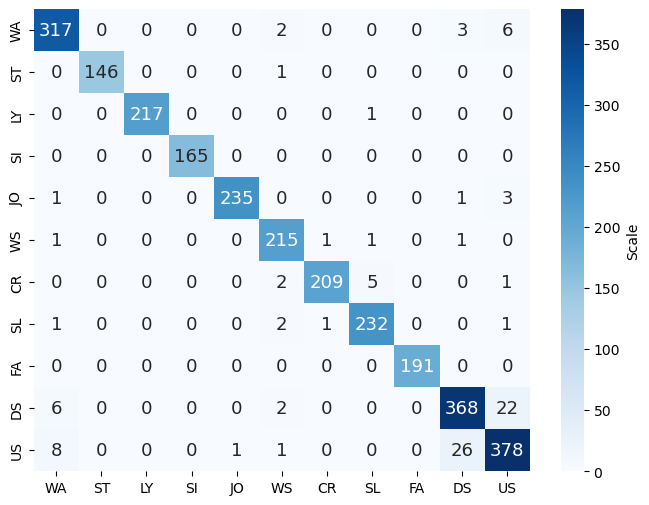

In [238]:
clf4 = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.0005, warm_start=False,
    random_state=int(best_params['random_state'])).fit(train_features, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
train_accuracy = clf4.score(train_features, label_train)
test_accuracy = clf4.score(test_features, label_test)

print(f"Accuracy of RF classifier on training set: {round(train_accuracy * 100, 1)}")
print(f"Accuracy of RF classifier on test set: {round(test_accuracy * 100, 1)}")
def model_size_in_bytes(model):
    return len(pickle.dumps(model))
print(f"Model size (MB): {round(model_size_in_bytes(clf4)/1024**2, 3)}")
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
_pred = clf4.predict(test_features)
_conf_matrix = confusion_matrix(label_test, _pred)
sns.heatmap(_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Scale'}, annot_kws={"size": 13})

L∆∞u/load model ƒë√£ build v·ªõi c√°c tham s·ªë t·ªëi ∆∞u

In [229]:
# try:
#     # ƒê·ªçc l·∫°i m√¥ h√¨nh v√† d·ªØ li·ªáu t·ª´ file
#     total_model = joblib.load(_dir + 'total_model.pkl')
#     results_model = pd.read_csv(_dir + "results_model.csv")
#     dfresultDelFeature = joblib.load(_dir + 'dfresultDelFeature.pkl')
#     sRF_new = joblib.load(_dir + 'random_forest_model.pkl')
#     train_features = joblib.load(_dir + 'train_features.pkl')
#     test_features = joblib.load(_dir + 'test_features.pkl')
#     label_test = joblib.load(_dir + 'label_test_Server.pkl')
#     label_train = joblib.load(_dir + 'label_train_Server.pkl')
#     best_params = joblib.load(_dir + 'best_params.pkl')
#     final_features = joblib.load(_dir + 'final_features.pkl')
#     X_train_reduced = joblib.load(_dir + 'X_train_reduced.pkl')
#     X_test_reduced = joblib.load(_dir + 'X_test_reduced.pkl')
#     print("‚úÖ ƒê√£ ƒë·ªçc l·∫°i to√†n b·ªô m√¥ h√¨nh v√† d·ªØ li·ªáu.")
# except Exception as e:
#     print(f"‚ùå Kh√¥ng th·ªÉ ƒë·ªçc d·ªØ li·ªáu. L·ªói: {e}")


# def model_size_in_bytes(model):
#     return len(pickle.dumps(model))

‚úÖ ƒê√£ ƒë·ªçc l·∫°i to√†n b·ªô m√¥ h√¨nh v√† d·ªØ li·ªáu.


T·ªëi ∆∞u ho√° ƒë·∫∑c tr∆∞ng v√† l∆∞u l·∫°i


Standard deviation of importance scores (including removed and remaining features): 0.0228

 Mean of importance scores (including removed and remaining features): 0.0231


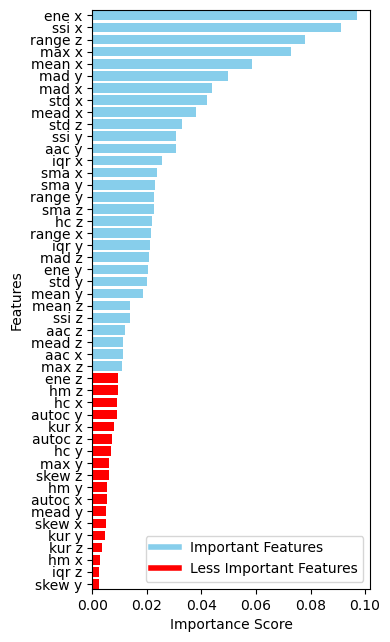


Final remaining features:
['max x', 'ssi x', 'range z', 'mad x', 'ene x', 'mad z', 'mean x', 'aac y', 'std x', 'sma x', 'std y', 'mead z', 'mead x', 'ene y', 'std z', 'mean y', 'mad y', 'iqr y', 'iqr x', 'ssi z', 'mean z', 'range x', 'max z', 'hc z', 'aac z', 'sma z', 'sma y', 'aac x', 'range y', 'ssi y']


In [231]:
X_train_reduced=[];X_test_reduced=[]
X_train_reduced, X_test_reduced, final_features= feature_selection_with_rf(clf4,
    train_features, test_features, label_train, Feature_name_ , threshold=0.01)


T√°i l·∫∑p ng·∫´u nhi√™n ƒë·ªÉ l·ª±a ch·ªçn t·ªëi ∆∞u k·∫øt qu·∫£

In [73]:
max_score = 0
iteration = 0  # ƒê·∫øm s·ªë l·∫ßn l·∫∑p
target_score = 97.3  # Ng∆∞·ª°ng ƒë·ªô ch√≠nh x√°c
best_random = 0
print(f"Iteration Training model...")

#============
param_dist = {
    '_random':range(1,200,1)       # ngau nhien 1:30
}

# Kh·ªüi t·∫°o m·ªôt DataFrame ƒë·ªÉ l∆∞u k·∫øt qu·∫£
results = []
_score = 0
# Th·ª±c hi·ªán Grid Search th·ªß c√¥ng

for _random in param_dist['_random']:
    # Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi tham s·ªë hi·ªán t·∫°i
    clf4 = RandomForestClassifier(criterion='entropy',
    class_weight='balanced', 
    n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.0005, warm_start=False,
    random_state=_random).fit(X_train_reduced, label_train)
    
    # T√≠nh to√°n ƒë·ªô ch√≠nh x√°c
    score = clf4.score(X_test_reduced, label_test)
    
    if _score < score:
        _score = score
        best_random = _random
        print("random_state= " , _random)
        print(f"Accuracy of RF classifier on test set: {round(score * 100, 1)}")
        print(f"Model size (MB): {round(model_size_in_bytes(clf4)/1024**2, 3)}")

    # del clf4
            





Iteration Training model...
random_state=  1
Accuracy of RF classifier on test set: 95.5
Model size (MB): 0.931
random_state=  2
Accuracy of RF classifier on test set: 95.6
Model size (MB): 0.927
random_state=  8
Accuracy of RF classifier on test set: 95.6
Model size (MB): 0.954
random_state=  11
Accuracy of RF classifier on test set: 95.7
Model size (MB): 0.946
random_state=  15
Accuracy of RF classifier on test set: 95.7
Model size (MB): 0.948
random_state=  22
Accuracy of RF classifier on test set: 96.1
Model size (MB): 0.922
random_state=  45
Accuracy of RF classifier on test set: 96.3
Model size (MB): 0.944


Th·ª≠ l·∫°i m√¥ h√¨nh sau khi r√∫t g·ªçn ƒë·∫∑c tr∆∞ng

In [ ]:
def featuresFromBufferNew(at):
    feat_dict = {}
    ax = np.array(at['Acc_X'], dtype=np.float64)
    ay = np.array(at['Acc_Y'], dtype=np.float64)
    az = np.array(at['Acc_Z'], dtype=np.float64)
    # T√≠nh to√†n b·ªô ƒë·∫∑c tr∆∞ng c·∫ßn thi·∫øt theo tr·ª•c
    feat_dict['Max x'] = np.max(ax)
    feat_dict['SSI x'] = np.sum(ax ** 2)
    feat_dict['Range z'] = np.max(az) - np.min(az)
    feat_dict['MAD x'] = np.mean(np.abs(ax - np.mean(ax)))
    feat_dict['Ene x'] = np.sqrt(np.mean(ax ** 2))
    feat_dict['MAD z'] = np.mean(np.abs(az - np.mean(az)))
    feat_dict['Mean x'] = np.mean(ax)
    feat_dict['aac y'] = np.mean(np.abs(np.diff(ay)))
    feat_dict['Std x'] = np.std(ax)
    feat_dict['SMA x'] = np.sum(np.abs(ax))
    feat_dict['Std y'] = np.std(ay)
    feat_dict['MeaD z'] = np.median(np.abs(az - np.median(az)))
    feat_dict['MeaD x'] = np.median(np.abs(ax - np.median(ax)))
    feat_dict['Ene y'] = np.sqrt(np.mean(ay ** 2))
    feat_dict['Std z'] = np.std(az)
    feat_dict['Mean y'] = np.mean(ay)
    feat_dict['MAD y'] = np.mean(np.abs(ay - np.mean(ay)))
    feat_dict['IQR y'] = np.percentile(ay, 75) - np.percentile(ay, 25)
    feat_dict['IQR x'] = np.percentile(ax, 75) - np.percentile(ax, 25)
    feat_dict['SSI z'] = np.sum(az ** 2)
    feat_dict['Mean z'] = np.mean(az)
    feat_dict['Range x'] = np.max(ax) - np.min(ax)
    feat_dict['Max z'] = np.max(az)
    feat_dict['hc z'] = (
        (np.sqrt(np.var(np.diff(np.diff(az))) / np.var(np.diff(az))) /
         np.sqrt(np.var(np.diff(az)) / np.var(az)))
    )
    feat_dict['aac z'] = np.mean(np.abs(np.diff(az)))
    feat_dict['SMA z'] = np.sum(np.abs(az))
    feat_dict['SMA y'] = np.sum(np.abs(ay))
    feat_dict['aac x'] = np.mean(np.abs(np.diff(ax)))
    feat_dict['Range y'] = np.max(ay) - np.min(ay)
    feat_dict['SSI y'] = np.sum(ay ** 2)

    # Tr·∫£ v·ªÅ ƒë·∫∑c tr∆∞ng theo ƒë√∫ng th·ª© t·ª± mong mu·ªën
    feature_order = [
        'Max x', 'SSI x', 'Range z', 'MAD x', 'Ene x', 'MAD z', 'Mean x', 'aac y',
        'Std x', 'SMA x', 'Std y', 'MeaD z', 'MeaD x', 'Ene y', 'Std z', 'Mean y',
        'MAD y', 'IQR y', 'IQR x', 'SSI z', 'Mean z', 'Range x', 'Max z', 'hc z',
        'aac z', 'SMA z', 'SMA y', 'aac x', 'Range y', 'SSI y'
    ]
    
    feat = np.array([feat_dict[f] for f in feature_order])
    return feat
train_featuresNew = []
for action in data_train:
    feat = featuresFromBufferNew(action)
    train_featuresNew.append(feat)

test_featuresNew =[]
for action in data_test:
    feat = featuresFromBufferNew(action)
    test_featuresNew.append(feat)
RF_new = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=17, # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=14, # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.0005, 
    warm_start=False,    
    random_state=22).fit(train_featuresNew, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
train_accuracy = RF_new.score(train_featuresNew, label_train)
test_accuracy = RF_new.score(test_featuresNew, label_test)
print(f"Accuracy of RF classifier on training set: {round(train_accuracy * 100, 1)}")
print(f"Accuracy of RF classifier on test set: {round(test_accuracy * 100, 1)}")
def model_size_in_bytes(model):
    return len(pickle.dumps(model))
print(f"Model size (MB): {round(model_size_in_bytes(RF_new)/1024**2, 3)}")
test_predict = RF_new.predict(test_featuresNew)
best_conf_matrix=confusion_matrix(label_test,test_predict)
plt.figure(figsize=(6, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, annot_kws={"size": 18})

# Set labels and title with font size 14
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('(a) RF on private dataset',fontsize=18)
# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=18)
plt.yticks(rotation=30, fontsize=18)

# Show plot
plt.show()

Accuracy of RF classifier on training set: 99.6
Accuracy of RF classifier on test set: 96.1
Model size (MB): 0.922


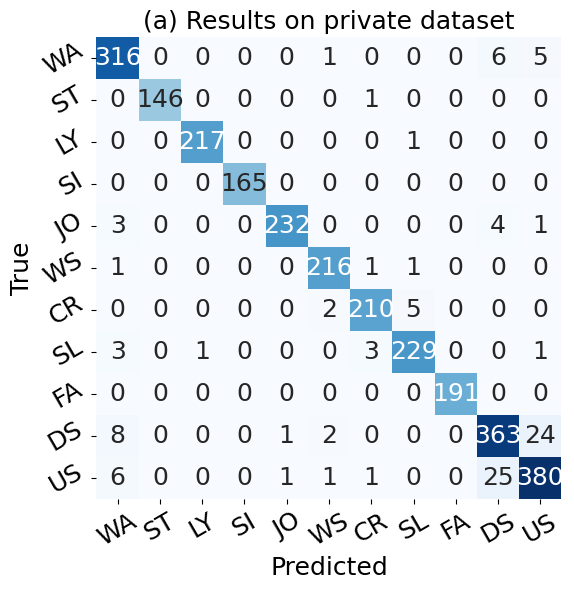

Activity    Acc    Sen    Spe    Pre     F1
0        WA   98.8   96.3   99.1   93.8   95.0
1        ST  100.0   99.3  100.0  100.0   99.7
2        LY   99.9   99.5  100.0   99.5   99.5
3        SI  100.0  100.0  100.0  100.0  100.0
4        JO   99.6   96.7   99.9   99.1   97.9
5        WS   99.7   98.6   99.8   97.3   98.0
6        CR   99.5   96.8   99.8   97.2   97.0
7        SL   99.5   96.6   99.7   97.0   96.8
8        FA  100.0  100.0  100.0  100.0  100.0
9        DS   97.5   91.2   98.5   91.2   91.2
10       US   97.7   91.8   98.7   92.5   92.1
11  Overall   99.3   96.1   99.6   96.1   97.0

In [408]:
sRF_new = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
    n_estimators=17, # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
    max_depth=14, # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
    max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
    n_jobs=-1, # S·ªë lu·ªìng th·ª±c thi song song (-1 ƒë·ªÉ s·ª≠ d·ª•ng t·∫•t c·∫£ CPU, default=None)
    ccp_alpha=0.0005, 
    warm_start=False,
    random_state=22).fit(X_train_reduced, label_train)
# ƒê√°nh gi√° m√¥ h√¨nh
train_accuracy = sRF_new.score(X_train_reduced, label_train)
test_accuracy = sRF_new.score(X_test_reduced, label_test)
test_predict = sRF_new.predict(X_test_reduced)
print(f"Accuracy of RF classifier on training set: {round(train_accuracy * 100, 1)}")
print(f"Accuracy of RF classifier on test set: {round(test_accuracy * 100, 1)}")
def model_size_in_bytes(model):
    return len(pickle.dumps(model))
print(f"Model size (MB): {round(model_size_in_bytes(sRF_new)/1024**2, 3)}")
best_conf_matrix=confusion_matrix(label_test,test_predict)
# Plot confusion matrix using seaborn heatmap without the color bar (scale)
plt.figure(figsize=(6, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names,
            cbar=False, annot_kws={"size": 18})

# Set labels and title with font size 14
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('(a) Results on private dataset',fontsize=18)
# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=18)
plt.yticks(rotation=30, fontsize=18)

# Show plot
plt.show()
calculate_metrics_class(best_conf_matrix,class_names)

In [235]:
#so s√°nh c√°c model khi ƒë∆∞·ª£c build v·ªõi train/test 6/4
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
models = [
    ('RF', RandomForestClassifier(criterion='entropy',class_weight='balanced', n_estimators=17, max_depth=14, max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
    bootstrap=True, n_jobs=-1, ccp_alpha=0.0005, warm_start=False, random_state=22)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=37, max_depth=14, learning_rate=0.05, random_state=22)),
    ('DT', DecisionTreeClassifier(max_depth=16,random_state=22)),
    ('GBDT', GradientBoostingClassifier(learning_rate=0.05, n_estimators=23, max_depth=5, random_state=45)),
    ('SVM', SVC(C=29, kernel='linear', random_state=22, probability=False)),
    ('LightGBM', lgb.LGBMClassifier(n_estimators=27, max_depth=14, learning_rate=0.05, random_state=22, verbose=-1))
]
Results_64=[]
for model_name, model_ in models:
    
    start_time = time.time()
    model_.fit(X_train_reduced,label_train)
    train_time = time.time() - start_time
    start_time = time.time()
    predict_= model_.predict(X_test_reduced)
    test_time = time.time() - start_time
    
    cm_ = confusion_matrix(label_test, predict_)
    avg_accuracy, avg_sensitivity, avg_specificity, avg_precision, _ = calculate_metrics(cm_, class_names)
    f1_micro_train = round(f1_score(label_train, model_.predict(X_train_reduced), average='micro') * 100, 1)
    avg_accuracy = round(avg_accuracy * 100, 1)
    avg_sensitivity = round(avg_sensitivity * 100, 1)
    avg_specificity = round(avg_specificity * 100, 1)
    avg_precision = round(avg_precision * 100, 1)
    f1_micro_test = round(f1_score(label_test, predict_, average='micro') * 100, 1)
    f1_macro_test = round(f1_score(label_test, predict_, average='macro') * 100, 1)
    size_model = model_size_in_bytes(model_)
    Results_64.append({
        'Model': model_name,
        'Accuracy (%)': avg_accuracy,
        'Sensitivity (%)': avg_sensitivity,
        'Specificity (%)': avg_specificity,
        'Precision (%)': avg_precision,
        # 'Train F1 Micro (%)': f1_micro_train,
        'Test F1 Micro (%)': f1_micro_test,
        'Test F1 Macro (%)':f1_macro_test,
        'Model Size (MB)': round(model_size_in_bytes(model_)/1024**2, 3),
        'Train Time (seconds)': train_time,
        'Test Time (seconds)': test_time
    })
    print(model_name, ": ", f1_micro_test)
pd.DataFrame(Results_64)

RF :  96.1
XGBoost :  95.5
DT :  91.7
GBDT :  93.4
SVM :  93.7
LightGBM :  95.2


Model  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  \
0        RF          99.3             97.0             99.6           97.1   
1   XGBoost          99.2             96.4             99.5           96.6   
2        DT          98.5             93.3             99.1           93.6   
3      GBDT          98.8             94.5             99.3           94.9   
4       SVM          98.9             94.8             99.4           94.6   
5  LightGBM          99.1             96.1             99.5           96.4   

   Test F1 Micro (%)  Test F1 Macro (%)  Model Size (MB)  \
0               96.1               97.0            0.922   
1               95.5               96.5            0.940   
2               91.7               93.5            0.057   
3               93.4               94.7            0.967   
4               93.7               94.7            0.247   
5               95.2               96.2            0.966   

   Train Time (seconds)  Test Time (seconds)  
0              0.120470             0.010951  
1              0.777574             0.002987  
2              0.199124             0.000000  
3             21.082139             0.015930  
4             21.833825             0.091597  
5              0.223017             0.007965

In [163]:
#test RF v·ªõi 5-folds
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
X_full = np.array(list(X_train_reduced)+list(X_test_reduced))
y_full = np.array(label_train+label_test)
kf_cv = KFold(n_splits=5, shuffle=True, random_state=99)
cv_train_accuracies = []
cv_test_accuracies = []
cv_conf_matrices = []
# ƒê·ªÉ l∆∞u fold t·ªët nh·∫•t
best_fold_index = -1
best_test_acc = -1
best_conf_matrix = None
best_train_acc = -1
train_feature_= []
test_feature_=[]
label_train_=[]
label_test_=[]
mode_rf = 0
results_private=[]
results_AF10=[]
for fold_index, (cv_train_idx, cv_test_idx) in enumerate(kf_cv.split(X_full), start=1):
    _ktrain = X_full[cv_train_idx]
    _label_train = y_full[cv_train_idx]
    _ktest = X_full[cv_test_idx]
    _label_test = y_full[cv_test_idx]
    rf_cv_model = RandomForestClassifier(criterion='entropy',class_weight='balanced', 
                                        n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
                                        max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
                                        max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
                                        bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
                                        ccp_alpha=0.0005, warm_start=False,
                                        n_jobs=-1, 
                                        random_state=45).fit(_ktrain, _label_train)

    _pred_test = rf_cv_model.predict(_ktest)    
    f1score_train = rf_cv_model.score(_ktrain, _label_train)
    f1score_test = rf_cv_model.score(_ktest,_label_test)
    _matrix = confusion_matrix(_label_test, _pred_test)
     # T√≠nh to√°n c√°c ch·ªâ s·ªë t·ª´ ma tr·∫≠n nh·∫ßm l·∫´n
    avg_accuracy, avg_sensitivity, avg_specificity, avg_precision,_ = calculate_metrics(_matrix,labels)


    # T√≠nh F1-score (macro v√† micro) tr√™n t·∫≠p ki·ªÉm tra
    test_f1_macro = f1_score(_label_test, _pred_test, average='macro') * 100  # F1 macro (%)
    test_f1_micro = f1_score(_label_test, _pred_test, average='micro') * 100  # F1 micro (%)

    # L∆∞u k·∫øt qu·∫£
    results_private.append({
        'Fold': fold_index,
        # 'Model Size (Bytes)': model_size_in_bytes(rf_cv_model),
        'Accuracy (%)': round(avg_accuracy * 100, 1),  # Accuracy (%)
        'Sensitivity (%)': round(avg_sensitivity * 100, 1),  # Sensitivity (%)
        'Specificity (%)': round(avg_specificity * 100, 1),  # Specificity (%)
        'Precision (%)': round(avg_precision * 100, 1),  # Precision (%)
        'Train F1 Micro':round(f1score_train*100,1),
        'Test F1 Micro (%)': round(test_f1_micro, 1),
        'Test F1 Macro (%)': round(test_f1_macro, 1)
    })
    # L∆∞u l·∫°i fold t·ªët nh·∫•t n·∫øu t·ªët h∆°n fold tr∆∞·ªõc ƒë√≥
    if f1score_test > best_test_acc:
        best_fold_index = fold_index
        best_test_acc = f1score_test
        best_train_acc = f1score_train
        best_conf_matrix = _matrix
        train_feature_= _ktrain
        test_feature_=_ktest
        label_train_=_label_train
        label_test_=_label_test
        mode_rf = rf_cv_model
    # L∆∞u ƒë·ªÉ th·ªëng k√™ chung
    cv_train_accuracies.append(f1score_train)
    cv_test_accuracies.append(f1score_test)
    cv_conf_matrices.append(_matrix)
df_results_private = pd.DataFrame(results_private)
# T√≠nh trung b√¨nh c√°c c·ªôt s·ªë h·ªçc, b·ªè qua c·ªôt 'Model'
mean_row = df_results_private.drop(columns=['Fold']).mean(numeric_only=True)
mean_row = mean_row.round(1)
# Chuy·ªÉn th√†nh dict v√† th√™m c·ªôt 'Model' l√† 'Average'
mean_row_dict = {'Fold': 'Average'}
mean_row_dict.update(mean_row.to_dict())

# Th√™m v√†o cu·ªëi danh s√°ch k·∫øt qu·∫£
results_private.append(mean_row_dict)

df_results_private = pd.DataFrame(results_private)

df_results_private

Fold  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  \
0        1          99.4             97.7             99.7           97.7   
1        2          99.2             96.6             99.5           96.7   
2        3          99.3             97.1             99.6           97.1   
3        4          99.3             97.1             99.6           97.1   
4        5          99.3             97.2             99.6           97.2   
5  Average          99.3             97.1             99.6           97.2   

   Train F1 Micro  Test F1 Micro (%)  Test F1 Macro (%)  
0            99.5               96.9               97.7  
1            99.7               95.6               96.6  
2            99.4               96.3               97.1  
3            99.6               96.1               97.1  
4            99.6               96.2               97.2  
5            99.6               96.2               97.1

In [406]:
feature_groups = {
    "mad": ['mad x', 'mad y', 'mad z'],
    "mean": ['mean x', 'mean y', 'mean z'],
    "range": ['range x', 'range y', 'range z'],
    "ene": ['ene x', 'ene y'],
    "std": ['std x', 'std y', 'std z'],
    "sma": ['sma x', 'sma y', 'sma z'],
    "ssi": ['ssi x', 'ssi y', 'ssi z'],
    "hjorth": ['hc z'],  # 'hm z' kh√¥ng c√≥ trong danh s√°ch ƒë·∫∑c tr∆∞ng ƒë√£ cho
    "max": ['max x', 'max z'],
    "iqr": ['iqr x', 'iqr y'],
    "aac": ['aac x', 'aac y', 'aac z'],
    "mead": ['mead x', 'mead z']
}
listFeature = [
    'max x', 'ssi x', 'range z', 'mad x', 'ene x', 'mad z', 'mean x', 'aac y',
    'std x', 'sma x', 'std y', 'mead z', 'mead x', 'ene y', 'std z', 'mean y',
    'mad y', 'iqr y', 'iqr x', 'ssi z', 'mean z', 'range x', 'max z', 'hc z',
    'aac z', 'sma z', 'sma y', 'aac x', 'range y', 'ssi y'
]
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

# D·ªØ li·ªáu
X_train = np.array(X_train_reduced)
y_train = label_train
X_test = np.array(X_test_reduced)
y_test = label_test

# ƒê·ªô ch√≠nh x√°c ban ƒë·∫ßu
base_score = 97
print(f"üîπ Base Accuracy with all features: {base_score:.1f}\n")

# Danh s√°ch ch·ªâ s·ªë ƒë·∫∑c tr∆∞ng
feature_index = {feat: idx for idx, feat in enumerate(listFeature)}
clf_temp = RandomForestClassifier(
        criterion='entropy', class_weight='balanced',
        n_estimators=int(best_params['n_estimators']),
        max_depth=int(best_params['max_depth']),
        max_features='sqrt',ccp_alpha=0.0005, 
        warm_start=False,
        bootstrap=True,
        n_jobs=-1, random_state=31
    )
# K·∫øt qu·∫£ l∆∞u tr·ªØ
dfresultDelFeature = []
# L·∫∑p qua t·ª´ng nh√≥m ƒë·∫∑c tr∆∞ng
for group_name, features in feature_groups.items():

    # X√°c ƒë·ªãnh ch·ªâ s·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng c·∫ßn g√°n = 0
    zero_indices = [feature_index[feat] for feat in features if feat in feature_index]

    # T·∫°o b·∫£n sao ƒë·ªÉ gi·ªØ nguy√™n d·ªØ li·ªáu g·ªëc
    X_train_new = X_train.copy()
    X_test_new = X_test.copy()

    # G√°n gi√° tr·ªã = 0 cho c√°c ƒë·∫∑c tr∆∞ng trong nh√≥m
    X_train_new[:, zero_indices] = 0
    X_test_new[:, zero_indices] = 0

    # Hu·∫•n luy·ªán v√† ƒë√°nh gi√°
    clf_temp = RandomForestClassifier(
        criterion='entropy', class_weight='balanced',
        n_estimators=int(best_params['n_estimators']),
        max_depth=int(best_params['max_depth']),
        max_features='sqrt',
        bootstrap=True,
        ccp_alpha=0.005,
        n_jobs=-1, random_state=31
    )
    clf_temp.fit(X_train_new, y_train)
    y_pred = clf_temp.predict(X_test_new)
    acc = f1_score(y_test, y_pred, average='macro')
    acc_percent = round(acc * 100, 1)
    delta_percent = round(acc_percent - base_score, 1)

    # Ghi l·∫°i k·∫øt qu·∫£
    dfresultDelFeature.append({
        'group': group_name,
        'features_zeroed': len(zero_indices),
        'accuracy_percent': acc_percent,
        'delta_percent': delta_percent
    })

# Hi·ªÉn th·ªã b·∫£ng t√≥m t·∫Øt
print("\nüìä Summary (zeroing features):")
print(f"{'Group':<10} | {'Zeroed':<7} | {'Accuracy (%)':<13} | {'Œî Accuracy (%)':<15}")
print("-" * 55)
for r in sorted(dfresultDelFeature, key=lambda x: x['delta_percent'], reverse=True):
    print(f"{r['group']:<10} | {r['features_zeroed']:<7} | {r['accuracy_percent']:<13.1f} | {r['delta_percent']:+.1f}")

üîπ Base Accuracy with all features: 97.0


üìä Summary (zeroing features):
Group      | Zeroed  | Accuracy (%)  | Œî Accuracy (%) 
-------------------------------------------------------
ssi        | 3       | 95.2          | -1.8
iqr        | 2       | 95.1          | -1.9
mead       | 2       | 95.1          | -1.9
mad        | 3       | 95.0          | -2.0
ene        | 2       | 94.9          | -2.1
sma        | 3       | 94.9          | -2.1
range      | 3       | 94.7          | -2.3
hjorth     | 1       | 94.7          | -2.3
max        | 2       | 94.5          | -2.5
aac        | 3       | 94.5          | -2.5
std        | 3       | 94.4          | -2.6
mean       | 3       | 94.3          | -2.7


X√°c th·ª±c ch√©o ng·∫´u nhi√™n 5 l·∫ßn

In [81]:
import warnings
warnings.filterwarnings("ignore")
import time
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

# DataFrame l∆∞u th·ªùi gian, ƒë·ªô ch√≠nh x√°c, k√≠ch th∆∞·ªõc m√¥ h√¨nh v√† c√°c ch·ªâ s·ªë kh√°c cho m·ªói m√¥ h√¨nh
results = []

n_estimators = int(best_params['n_estimators'])
max_depth = int(best_params['max_depth'])
data_full = np.array(list(X_train_reduced) + list(X_test_reduced))
label_full = np.concatenate([label_train, label_test])


# KFold
kf_cv = KFold(n_splits=5, shuffle=True, random_state=45)
# C√°c m√¥ h√¨nh
models = [
    ('RF', RandomForestClassifier(criterion='entropy',class_weight='balanced', 
                                  n_estimators=int(best_params['n_estimators']), # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (default=100)
                                  max_depth=int(best_params['max_depth']), # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (default=None, grow until all leaves are pure)
                                  max_features='sqrt', # S·ªë ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c xem x√©t khi t√°ch (default='sqrt')
                                  bootstrap=True, # C√≥ s·ª≠ d·ª•ng bootstrap hay kh√¥ng (default=True)
                                  ccp_alpha=0.0005, warm_start=False,
                                  n_jobs=-1, 
		                          random_state=22
    )),
    ('XGBoost', xgb.XGBClassifier(
        n_estimators=37,
        max_depth=14,
        learning_rate=0.05,
        random_state=22,
    )),
    ('LightGBM', lgb.LGBMClassifier(
        n_estimators=27,
        max_depth=14,
        learning_rate=0.05,
        random_state=22,
        verbose=-1,
    )),
    ('DT', DecisionTreeClassifier(max_depth=16,random_state=22)),
    ('GBDT', GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=35,
        max_depth=4,
        random_state=22
    )),
    ('SVM', SVC(C=29, kernel='linear', random_state=22, probability=True))  # probability=True for AUC
    # ('KNN', KNeighborsClassifier(n_neighbors=6, weights='distance')),

]
final_results = []
total_model = {}
for model_name, model_ in models:
    nameModel,size_model,acc_list, sens_list, spec_list, prec_list = [],[], [], [], [],[]
    train_f1_micro_list, test_f1_micro_list, test_f1_macro_list, auc_list = [], [], [], []
    Time_train =[]
    Time_test=[]
    for train_index, test_index in kf_cv.split(data_full):
        fold_train, fold_test = data_full[train_index], data_full[test_index]
        label_fold_train, label_fold_test = label_full[train_index], label_full[test_index]
        start_time = time.time()
        model_.fit(fold_train, label_fold_train)
        train_time = time.time() - start_time
        Time_train.append(train_time)
        # D·ª± ƒëo√°n
        start_time = time.time()
        y_pred = model_.predict(fold_test)
        test_time = time.time() - start_time
        Time_test.append(test_time)
        cm = confusion_matrix(label_fold_test, y_pred)
        avg_accuracy, avg_sensitivity, avg_specificity, avg_precision, _ = calculate_metrics(cm, class_names)

        nameModel.append(model_name)
        size_model.append(model_size_in_bytes(model_))
        f1_micro_train = round(f1_score(label_fold_train, model_.predict(fold_train), average='micro') * 100, 1)
        f1_micro_test = round(f1_score(label_fold_test, y_pred, average='micro') * 100, 1)
        f1_macro_test = round(f1_score(label_fold_test, y_pred, average='macro') * 100, 1)
        avg_accuracy = round(avg_accuracy * 100, 1)
        avg_sensitivity = round(avg_sensitivity * 100, 1)
        avg_specificity = round(avg_specificity * 100, 1)
        avg_precision = round(avg_precision * 100, 1)
        acc_list.append(avg_accuracy)
        sens_list.append(avg_sensitivity)
        spec_list.append(avg_specificity)
        prec_list.append(avg_precision)
        train_f1_micro_list.append(f1_micro_train)
        test_f1_micro_list.append(f1_micro_test)
        test_f1_macro_list.append(f1_macro_test)
    # Sau khi t√≠nh xong c√°c metrics t·ª´ng fold
    final_results.append({
        'Model': model_name,
        'Model Size (Bytes)': round(np.mean(size_model), 1),
        'Train Time (seconds)': round(np.mean(Time_train),5),
        'Test Time (seconds)': round(np.mean(Time_test),5),
        'Accuracy (%)': round(np.mean(acc_list), 1),
        'Sensitivity (%)': round(np.mean(sens_list), 1),
        'Specificity (%)': round(np.mean(spec_list), 1),
        'Precision (%)': round(np.mean(prec_list), 1),
        'Train F1 Micro (%)': round(np.mean(train_f1_micro_list), 1),
        'Test F1 Micro (%)': round(np.mean(test_f1_micro_list), 1),
        'Test F1 Macro (%)': round(np.mean(test_f1_macro_list), 1)
    })
    total_model[model_name] = {
        'Model': nameModel.copy(),
        'Model Size (Bytes)': size_model.copy(),
        'Accuracy (%)': acc_list.copy(),
        'Train Time (seconds)': Time_train.copy(),
        'Test Time (seconds)': Time_test.copy(),
        'Sensitivity (%)': sens_list.copy(),
        'Specificity (%)': spec_list.copy(),
        'Precision (%)': prec_list.copy(),
        'Train F1 Micro (%)': train_f1_micro_list.copy(),
        'Test F1 Micro (%)': test_f1_micro_list.copy(),
        'Test F1 Macro (%)': test_f1_macro_list.copy(),
    }

# Xu·∫•t k·∫øt qu·∫£
results_model = pd.DataFrame(final_results)
results_model

Model  Model Size (Bytes)  Train Time (seconds)  Test Time (seconds)  \
0        RF           1095641.0               0.11469              0.01016   
1   XGBoost           1119624.0               0.93508              0.00259   
2  LightGBM           1014536.2               0.22939              0.00378   
3        DT             73576.4               0.23875              0.00060   
4      GBDT            918278.4              35.07245              0.01015   
5       SVM            330042.6             168.61113              0.05974   

   Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  \
0          99.3             97.2             99.6           97.2   
1          99.3             96.8             99.6           96.8   
2          99.3             96.9             99.6           97.0   
3          98.6             94.1             99.2           94.1   
4          99.0             95.4             99.4           95.7   
5          98.8             94.6             99.3           94.4   

   Train F1 Micro (%)  Test F1 Micro (%)  Test F1 Macro (%)  
0                99.6               96.2               97.2  
1                99.7               96.0               96.8  
2                99.2               96.0               96.9  
3                99.6               92.5               94.1  
4                97.1               94.4               95.5  
5                94.6               93.6               94.5

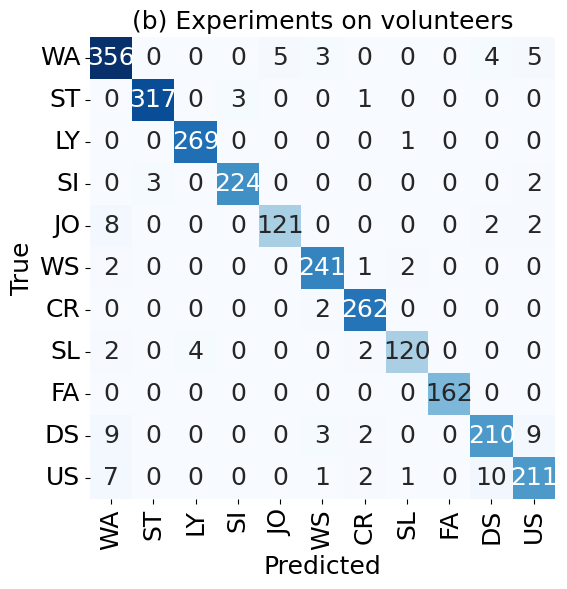

Activity    Acc    Sen    Spe    Pre     F1
0        WA   98.3   95.4   98.7   92.7   94.1
1        ST   99.7   98.8   99.9   99.1   98.9
2        LY   99.8   99.6   99.8   98.5   99.1
3        SI   99.7   97.8   99.9   98.7   98.2
4        JO   99.3   91.0   99.8   96.0   93.4
5        WS   99.5   98.0   99.6   96.4   97.2
6        CR   99.6   99.2   99.7   97.0   98.1
7        SL   99.5   93.8   99.8   96.8   95.2
8        FA  100.0  100.0  100.0  100.0  100.0
9        DS   98.5   90.1   99.3   92.9   91.5
10       US   98.5   90.9   99.2   92.1   91.5
11  Overall   99.3   96.2   99.6   96.2   96.1

In [114]:
# Data from the confusion matrix
dataRT = [
    [356, 0, 0, 0, 5, 3, 0, 0, 0, 4, 5],
    [0, 317, 0, 3, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 269, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 3, 0, 224, 0, 0, 0, 0, 0, 0, 2],
    [8, 0, 0, 0, 121, 0, 0, 0, 0, 2, 2],
    [2, 0, 0, 0, 0, 241, 1, 2, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 262, 0, 0, 0, 0],
    [2, 0, 4, 0, 0, 0, 2, 120, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 162, 0, 0],
    [9, 0, 0, 0, 0, 3, 2, 0, 0, 210, 9],
    [7, 0, 0, 0, 0, 1, 2, 1, 0, 10, 211]
]
# Create DataFrame
confusion_matrix_df = pd.DataFrame(dataRT, index=class_names, columns=class_names)
# Plot confusion matrix using seaborn heatmap without the color bar (scale)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues",
            xticklabels=confusion_matrix_df.columns, yticklabels=confusion_matrix_df.index,
            cbar=False, annot_kws={"size": 18})
# Set labels and title with font size 14
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('(b) Experiments on volunteers',fontsize=18)
# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=90, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
# Show plot
plt.show()
calculate_metrics_class(dataRT,class_names)

In [407]:
try:
# # Ghi k·∫øt qu·∫£ v√†o file CSV
#     joblib.dump(total_model, _dir+'total_model.pkl')
#     results_model.to_csv(_dir+"results_model.csv", index=False)
    # joblib.dump(dfresultDelFeature, _dir+'dfresultDelFeature.pkl')
    # joblib.dump(sRF_new, _dir+'random_forest_model.pkl')   #model t·ªëi ∆∞u tham s·ªë nh∆∞ng ch∆∞a t·ªëi ∆∞u ƒë·∫∑c tr∆∞ng
#     joblib.dump(train_features, _dir+'train_features.pkl')
#     joblib.dump(test_features, _dir+'test_features.pkl')
#     joblib.dump(label_test, _dir+'label_test_Server.pkl')
#     joblib.dump(label_train, _dir+'label_train_Server.pkl')
    # joblib.dump(best_params, _dir+'best_params.pkl')
#     joblib.dump(final_features, _dir+'final_features.pkl') #danh s√°ch ƒë·∫∑c tr∆∞ng t·ªëi ∆∞u
#     joblib.dump(X_train_reduced, _dir+'X_train_reduced.pkl')
#     joblib.dump(X_test_reduced, _dir+'X_test_reduced.pkl')

except Exception as e:
    print(f"Kh√¥ng th·ªÉ ghi file CSV. L·ªói: {e}")

In [ ]:
# output model
from micromlgen import port
sRF_new
c_code = port(sRF_new, classmap = {
    0: 'walking',
    1: 'Standing',
    2: 'Lying',
    3: 'Sitting',
    4: 'Jogging',
    5: 'WalkStoop',
    6: 'Crawling',
    7: 'Slithering',
    8: 'Falling',
    9: 'Downstair',
    10: 'Upstair'
})

# B∆∞·ªõc 3: Ghi ra file .h
with open(_dir+"RandomForestModel.h", "w") as f:
    f.write(c_code)